In [ ]:
!pip install yfinance -q
!pip install pyyaml==5.4.1 -q
!pip install darts -q
!pip install -U pip -q
!pip install -U matplotlib -q

     |████████████████████████████████| 62 kB 309 kB/s 
     |████████████████████████████████| 636 kB 7.6 MB/s 
     |████████████████████████████████| 424 kB 9.2 MB/s 
     |████████████████████████████████| 705 kB 40.4 MB/s 
     |████████████████████████████████| 1.8 MB 50.2 MB/s 
     |████████████████████████████████| 76.6 MB 73 kB/s 
     |████████████████████████████████| 9.8 MB 39.0 MB/s 
     |████████████████████████████████| 44 kB 2.1 MB/s 
     |████████████████████████████████| 43 kB 726 kB/s 
     |████████████████████████████████| 11.2 MB 39.2 MB/s 
     |████████████████████████████████| 1.6 MB 53.6 MB/s 
     |████████████████████████████████| 957 kB 55.3 MB/s 
     |████████████████████████████████| 5.9 MB 47.5 MB/s 
     |████████████████████████████████| 419 kB 52.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.2+zzzc

In [ ]:
!pip install matplotlib==3.5.3 -q

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.metrics import mape
import yfinance as yf
from darts.models import AutoARIMA, KalmanForecaster, LinearRegressionModel, NBEATSModel, ExponentialSmoothing, Theta, TCNModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
sp500 = pd.DataFrame(yf.Ticker('^GSPC').history(period="max"))
sp500['date'] = sp500.index
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0,1950-01-03
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0,1950-01-04
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0,1950-01-05
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0,1950-01-06
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0,1950-01-09
...,...,...,...,...,...,...,...,...
2022-08-23,4133.089844,4159.770020,4124.029785,4128.729980,3117800000,0,0,2022-08-23
2022-08-24,4126.549805,4156.560059,4119.970215,4140.770020,3056910000,0,0,2022-08-24
2022-08-25,4153.259766,4200.540039,4147.589844,4199.120117,2976050000,0,0,2022-08-25


In [ ]:
sp500 = sp500.set_index('date').asfreq('d', method='bfill')
print(sp500.index.freq)

<Day>


In [ ]:
sp500Month = sp500.Close
sp500Month.index = pd.to_datetime(sp500.index)
sp500Month = sp500Month.resample('1M').mean()
len(sp500Month)

872

In [ ]:
prices = TimeSeries.from_series(sp500.Close) 
prices_month = TimeSeries.from_series(sp500Month) 

In [ ]:
train, val = prices.split_before(0.9)
train_m, val_m = prices_month.split_before(0.9)

In [ ]:
len(train_m)

783

# **NBEATS MODEL - facebook**

In [ ]:
model = NBEATSModel(input_chunk_length=24, output_chunk_length=12).fit(train_m)
forecast = model.predict(len(val_m))

train_m.plot()
val_m.plot()
forecast.plot()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
49.575    Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:653: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


Predicting: 17it [00:00, ?it/s]

ImportError: ignored

<Figure size 432x288 with 1 Axes>

# **Theta model**

In [ ]:
model = Theta().fit(train_m)
forecast = model.predict(len(val_m))

train_m.plot()
val_m.plot()
forecast.plot()

ImportError: ignored

<Figure size 432x288 with 1 Axes>

# **Eksponencijalno izravnanje**

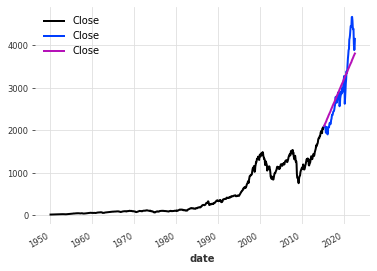

In [ ]:
model = ExponentialSmoothing().fit(train_m)
forecast = model.predict(len(val_m))

train_m.plot()
val_m.plot()
forecast.plot()

# **AutoARIMA**

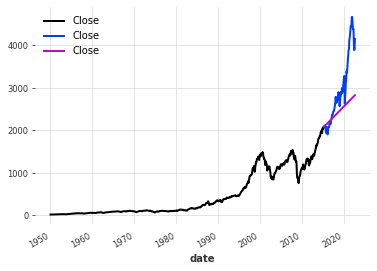

In [ ]:
model = AutoARIMA().fit(train_m)
forecast = model.predict(len(val_m))

train_m.plot()
val_m.plot()
forecast.plot()

# **Kalmanova Prognoza**

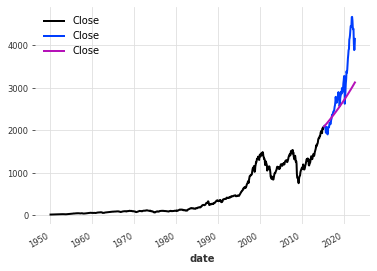

In [ ]:
model = KalmanForecaster().fit(train_m)
forecast = model.predict(len(val_m))

train_m.plot()
val_m.plot()
forecast.plot()

# **Linearna Regresija**

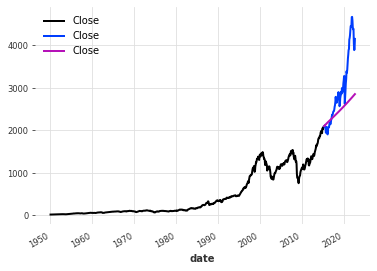

In [ ]:
model = LinearRegressionModel(lags=12).fit(train_m)
forecast = model.predict(len(val_m))

train_m.plot()
val_m.plot()
forecast.plot()

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_sp500 = Scaler()

scaler_sp500_scaled = scaler_sp500.fit_transform(prices_month)

In [ ]:
train, val = scaler_sp500_scaled.split_before(0.9)

Mean absolute percentage error for the combined naive drift + seasonal: 15.63%.


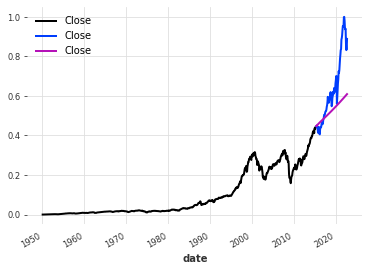

In [ ]:
model = LinearRegressionModel(lags=12).fit(train)
forecast = model.predict(len(val))

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(val, forecast)
    )
)

train.plot()
val.plot()
forecast.plot()

Mean absolute percentage error for the combined naive drift + seasonal: 11.96%.


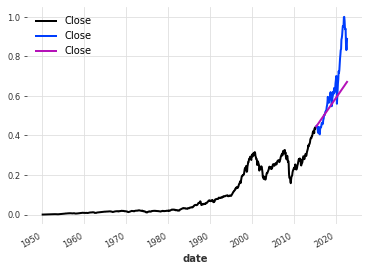

In [ ]:
model = AutoARIMA().fit(train)
forecast = model.predict(len(val))

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(val, forecast)
    )
)
train.plot()
val.plot()
forecast.plot()

# **Temporalne Konvolucijske Mreže model**

In [ ]:
model_air = TCNModel(
    input_chunk_length=13,
    output_chunk_length=12,
    n_epochs=500,
    dropout=0.1,
    dilation_base=2,
    weight_norm=True,
    kernel_size=5,
    num_filters=3,
    random_state=0,
)

model_air.fit(
    series=train,
    val_series=val,
    verbose=True,
)

Predicting: 24it [00:00, ?it/s]

Mean absolute percentage error for the combined naive drift + seasonal: 27.20%.


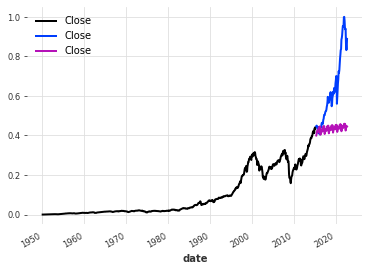

In [ ]:
forecast = model_air.predict(len(val))

print(
    "Mean absolute percentage error for the combined naive drift + seasonal: {:.2f}%.".format(
        mape(val, forecast)
    )
)
train.plot()
val.plot()
forecast.plot()